# Optics of  Condenser System of the TEM


part of 
## [MSE672- Introduction to Transmission Electron Microsocpy](_MSE672-IntroToTEM.ipynb)

Chapter 2 [Diffraction](Diffraction.ipynb)

by Gerd Duscher, UTK, Fall 2018



## Import numerial and plotting python packages

In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook


Populating the interactive namespace from numpy and matplotlib




## First we define some programs 


In [2]:

# ----------------------------------------------------------------
# Modified from Michael Fairchild :simply draws a thin-lens at the provided location parameters:
#     - z:    location along the optical axis (in mm)
#     - f:    focal length (in mm, can be negative if div. lens)
#     - diam: lens diameter in mm
#     - lbl:  label to identify the lens on the drawing
# ----------------------------------------------------------------
def add_lens(z, f, diam, lbl):
    ww, tw, rad = diam / 10.0, diam/3.0, diam / 2.0
    plt.plot([z, z],    [-rad, rad],                'k', linewidth=2)
    plt.plot([z, z+tw], [-rad, -rad+np.sign(f)*ww], 'k', linewidth=2)
    plt.plot([z, z-tw], [-rad, -rad+np.sign(f)*ww], 'k', linewidth=2)
    plt.plot([z, z+tw], [ rad,  rad-np.sign(f)*ww], 'k', linewidth=2)
    plt.plot([z, z-tw], [ rad,  rad-np.sign(f)*ww], 'k', linewidth=2)
    plt.plot([z+f, z+f], [-ww,ww], 'k', linewidth=2)
    plt.plot([z-f, z-f], [-ww,ww], 'k', linewidth=2)
    plt.text(z,rad+5.0, lbl, fontsize=12)
    plt.text(z,rad+2.0, 'f='+str(int(f)), fontsize=10)

def propagate_beam(p0, NA, nr, zl, ff, lbl='', col='b'):
    # ----------------------------------------------------------------------
    #      geometrical propagation of light rays from given source
    # parameters:
    #    - p0:  location of the source (z0, x0) along and off axis (in mm)
    #    - NA:  numerical aperture of the beam (in degrees)
    #    - nr:  number of rays to trace
    #    - zl:  array with the location of the lenses
    #    - ff:  array with the focal length of lenses
    #    - lbl: label for the nature of the source
    #    - col: color of the rays on plot
    # ----------------------------------------------------------------------

    # aperture (maximum angle) in radians 
    apa = NA*np.pi/180.0
    
    #position of source is z0,x0
    z0 = p0[0]
    if (np.size(p0) == 2): x0 = p0[1]
    else:                  x0 = 0.0
 
    # list of lens positions    
    zl1, ff1 = zl[(z0 < zl)], ff[(z0 < zl)]
    nl  = np.size(zl1) # number of lenses
 
    zz, xx, tani = np.zeros(nl+2), np.zeros(nl+2), np.zeros(nl+2)
    tan0 = np.tan(apa/2.0) - np.tan(apa) * np.arange(nr)/(nr-1) 
 
    for i in range(nr):
        tani[0] = tan0[i] # initial incidence angle
        zz[0], xx[0] = z0, x0
        for j in range(nl):
            zz[j+1]   = zl1[j]
            xx[j+1]   = xx[j] + (zz[j+1]-zz[j]) * tani[j]
            tani[j+1] = tani[j] - xx[j+1] / ff1[j]
 
        zz[nl+1] = zmax
        xx[nl+1] = xx[nl] + (zz[nl+1]-zz[nl]) * tani[nl]
        plt.plot(zz, xx, col)
        
def add_aperture(z, diam, radius, lbl):
    ww, tw, rad = diam / 10.0, diam/3.0, diam / 2.0
    radius = radius/2 
    plt.plot([z, z],    [-rad, -radius],                'k', linewidth=2)
    plt.plot([z, z],    [rad, radius],                'k', linewidth=2)
    plt.text(z,-rad-2.0, lbl, fontsize=12)
 
zmin, zmax       = -100., 1600.
xmin, xmax       = -25, 25
bignum, smallnum = 1e6, 1e-6   # all distances expressed in mm


## Condensor Ray Diagram

<IPython.core.display.Javascript object>


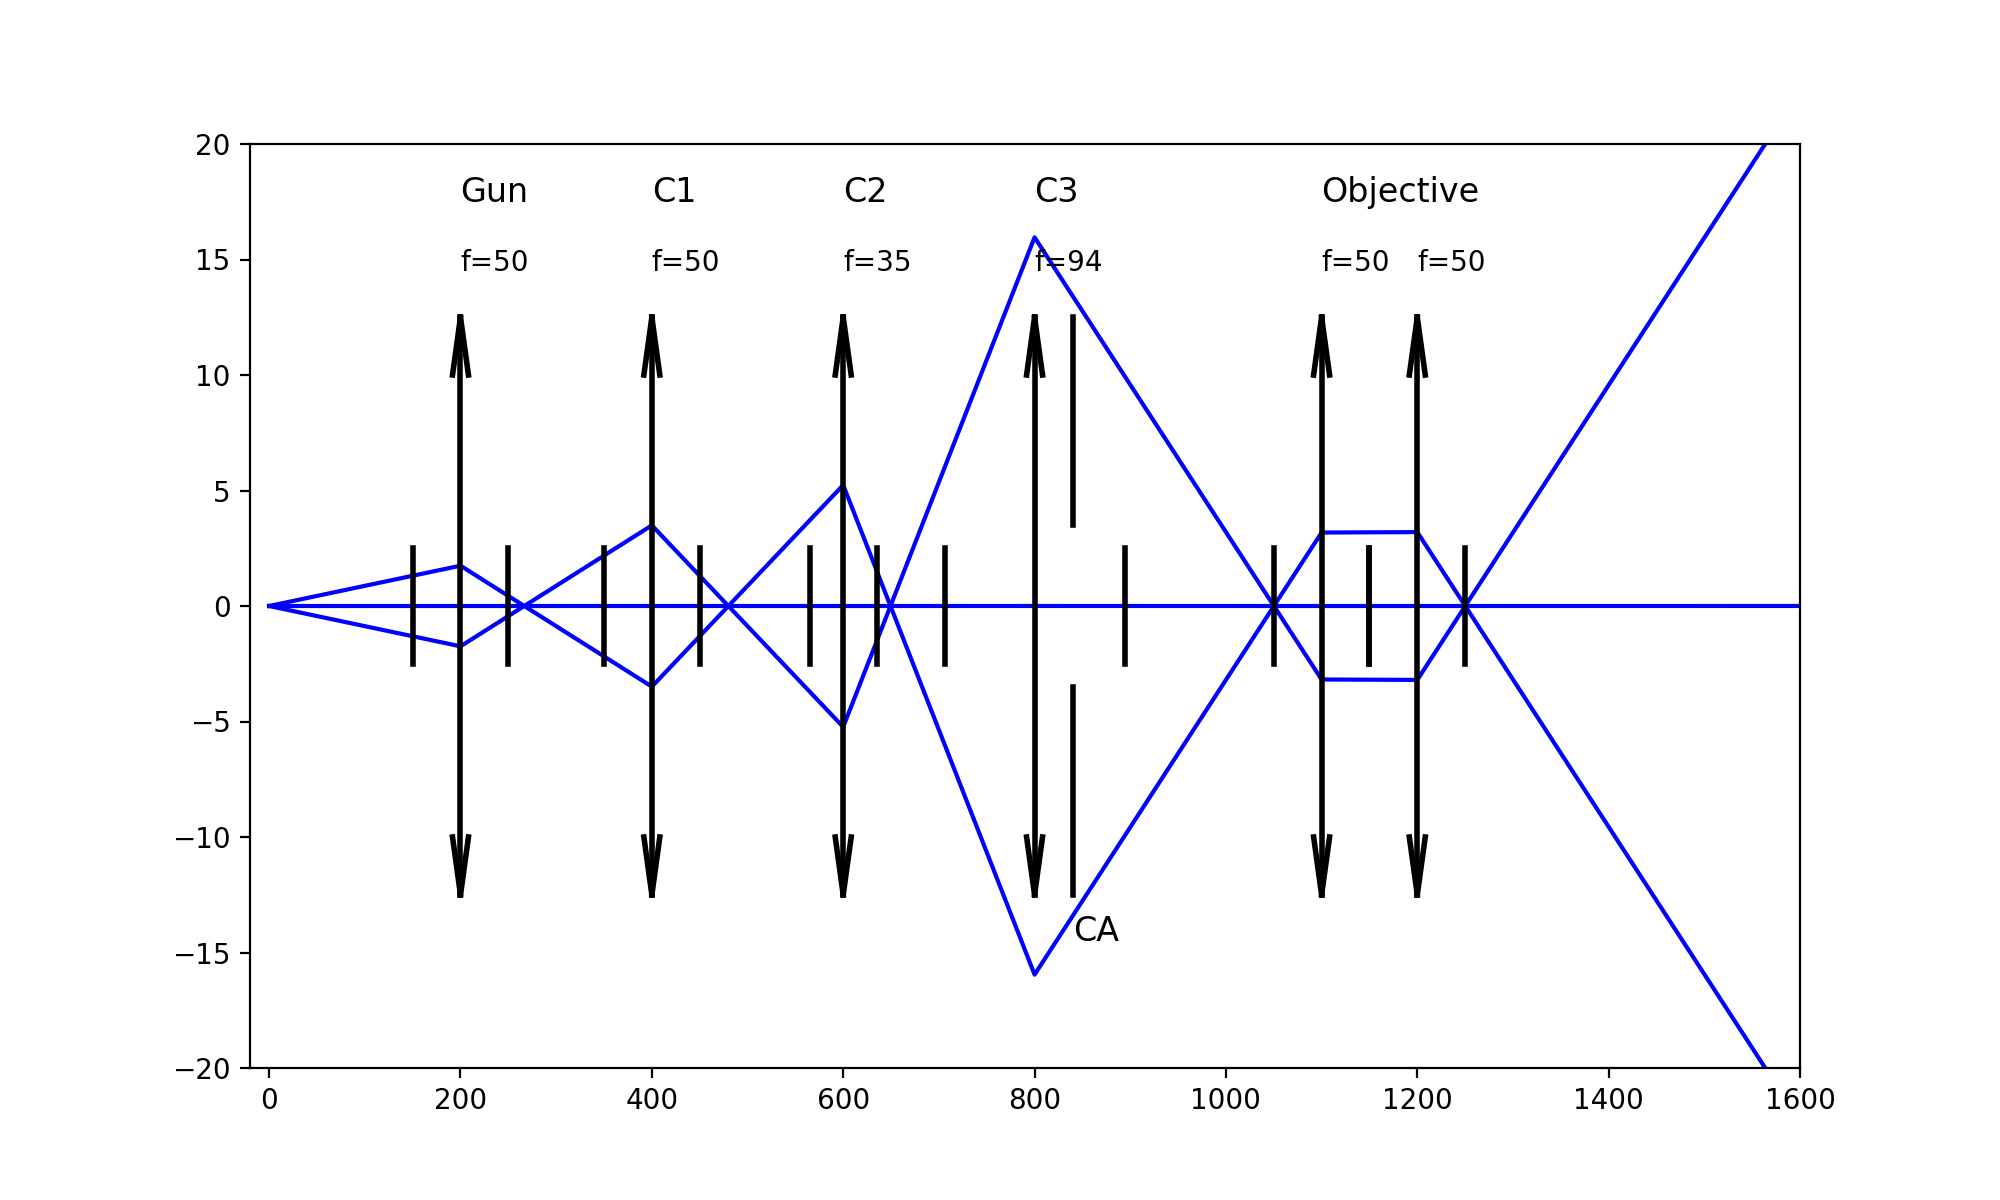

In [7]:

plt.figure(figsize=(10, 6))
# Define lenses here
lenses =      ['Gun', 'C1', 'C2', 'C3' , 'Objective', '']
zl = np.array([200.0, 400.0, 600.0, 800.0, 1100,1200    ]) # lens positions
ff = np.array([60.0, 70.0,  90.0,  200.0 ,  50,  50]) # lens focal lengths for Spot Mode in TEM
ff = np.array([50.0, 70.0,  90.0,  142.0 ,  50,  50]) # Koehler Illumination

ff = np.array([50.0, 50.0,  35.0,  94.0 ,  50,  50]) # play around with 

propagate_beam((0,),1,  3, zl, ff, 'DM',   'b')
#      add the lenses
for i in range(np.size(zl)): add_lens(zl[i], ff[i], 25, lenses[i])
add_aperture(840, 25, 7, 'CA')

#     plot optical axis and title
plt.axis([-20,zmax, -20, 20]);

## Conclusion
If you select any mode, magnification or brightness, the computer looks up a dataset and provides the stored values of currents to the respective lenses and other optical elements. 

An engineering alignment determines those values and users only have to deal with the fine-tuning of the electron optical system.